# Movimento Harmônico Amortecido (MHA)

O MHA pode ser descrito de forma simplificada por um sistema massa mola oscilando em torno da posição de equilibrio. Para uma força restauradora do tipo $F=-kx$ e uma força de amortecimento $F=-b\dot{x}$, a equação desse MHA é dada por:

$$\ddot{x}+\gamma \dot{x} + \omega_{0}^2 x =0 $$

onde $\omega_{0}=\sqrt{\frac{k}{m}}$ e $\gamma=\frac{b}{m}$.

### Amortecimento subcrítico ($\gamma/2<\omega_0$)

Nesse caso, a solução geral é dada por:

$$x(t)=A e^{-\frac{\gamma}{2}t}cos(\omega t + \phi)$$

onde $\omega=\sqrt{\omega_0^2-\left(\frac{\gamma}{2}\right)^2}$. $A$ e $\phi$ dependem das condições iniciais do sistema.

In [334]:
############# BIBLIOTECAS BÁSICAS ####################
import math
import numpy as np
import matplotlib.pyplot as plt

In [346]:
# Amplitude em metros
A0=1
# Massa
m=1.
# Frequência natural em Hz
f=0.5
# Frequência angular natural em rad/s (raiz(k/m))
w0=2*math.pi*f
# Gamma (b/m) 1/s
gamma=0.1*w0
# Constante de fase (phi)
phi=0 #não alterar
# Tempo de oscilação
tmax=30.
# Mínimo intervalo de tempo
dt=0.01


In [347]:
# Vetor t, A(t), x(t), E(t), E_normalizado(t)
t = []
At = []
xt = []
Et = []
Etn = []
#Discretizando o tempo
t.append(0.)
imax=int(tmax/dt)
for i in range(1,imax):
   t.append(t[i-1]+dt)

#Condições iniciais
phi=phi*math.pi/180
At.append(A0)
xt.append(A0*math.cos(phi))
Et.append(0.5*m*w0**2*A0**2)
Etn.append(1.)
#Frequência de oscilação
w=math.sqrt(w0**2-(gamma/2)**2)

#Amplitude em função do tempo
for i in range(1,imax):
    At.append(A0*math.exp(-gamma/2*t[i]))
    xt.append(At[i]*math.cos(w*t[i]+phi))
    Et.append(0.5*m*w0**2*A0**2*math.exp(-gamma*t[i]))
    Etn.append(math.exp(-gamma*t[i]))
#Energia no MHA subamortecido



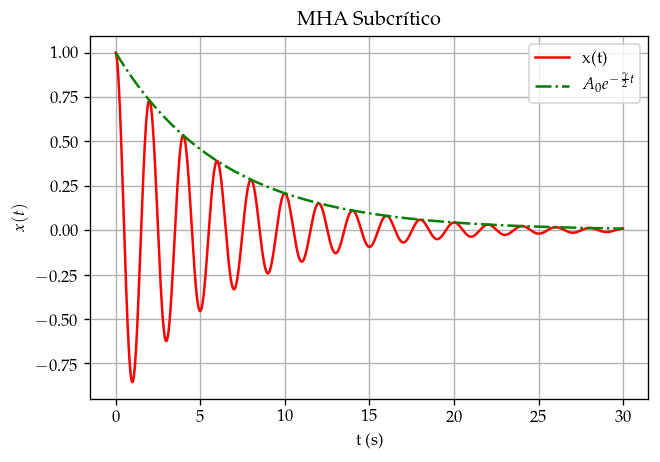

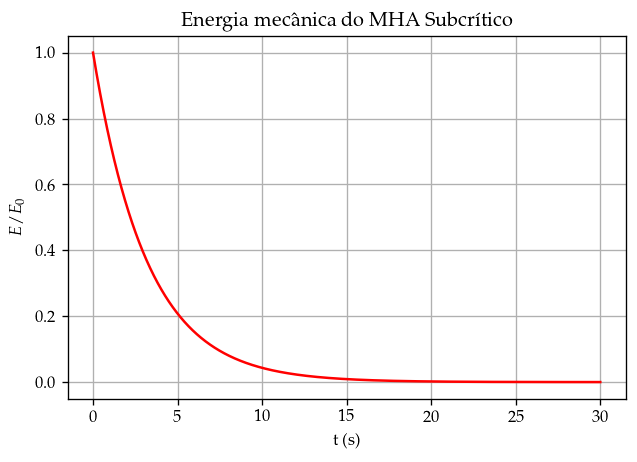

In [348]:
#Gráficos x vs t
plt.rcParams['figure.dpi'] = 120.0    

from matplotlib import rc
#rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.title('MHA Subcrítico')
plt.plot(t,xt,'r-',label='x(t)')
plt.plot(t,At,'g-.',label=r'$A_0e^{-\frac{\gamma}{2}t}$',markersize=1)
plt.ylabel(r'$x(t)$')
plt.xlabel('t (s)')
plt.legend()
plt.grid()
plt.show()  

plt.title('Energia mecânica do MHA Subcrítico')
plt.plot(t,Etn,'r-')
plt.ylabel(r'$E/E_0$')
plt.xlabel('t (s)')

plt.grid()
plt.show()  

### Amortecimento supercrítico ($\gamma/2>\omega_0$)

Nesse caso, não há movimento oscilatório e a solução geral é dada por:

$$x(t)=e^{-\frac{\gamma}{2}t} \left( c_1 e^{\beta t} + c_2 e^{-\beta t} \right)$$

onde $\beta=\sqrt{\left(\frac{\gamma}{2}\right)^2-\omega_0^2}$. As constantes $c_1$ e $c_2$ dependem das condições iniciais do sistema, sendo:

$$c_1=v_0+\frac{(\gamma/2+\beta)A_0}{2 \beta}$$
e

$$c_2=A_0-c_1$$


In [349]:
###PARÂMETROS###
# Amplitude em metros
A0=1
# Massa
m=1.
# Frequência natural em Hz
f=0.5
# Frequência angular natural em rad/s (raiz(k/m))
w0=2*math.pi*f
# Gamma (b/m) 1/s
gamma=2.5*w0
# Constante de fase (phi) em graus
phi=0.
# v(t=0)
v0=0.


In [350]:
#x(t)
xt2 = []

#Condições iniciais
phi=phi*math.pi/180

##Constantes
beta=math.sqrt((gamma/2)**2-w0**2)
c1=v0+(gamma/2+beta)*A0/(2*beta)
c2=A0-c1
##Solução geral

At2.append(A0)
xt2.append(A0*math.cos(phi))

#Amplitude em função do tempo
for i in range(1,imax):
    xt2.append(math.exp(-gamma*t[i]/2)*(c1*math.exp(beta*t[i])+c2*math.exp(-beta*t[i])))

### Amortecimento crítico ($\gamma/2=\omega_0$)

Aqui também não há movimento oscilatório e a solução geral é dada por:

$$x(t)=e^{-\frac{\gamma}{2}t} \left( c_3 + c_4 t\right)$$

As constantes $c_3$ e $c_4$ dependem das condições iniciais do sistema.

In [351]:
#x(t)
xt3 = []

##Constantes
c3=A0
c4=0.5*gamma*A0
##Solução geral

xt3.append(c3)

#Amplitude em função do tempo
for i in range(1,imax):
    xt3.append((c3+c4*t[i])*math.exp(-gamma*t[i]/2))

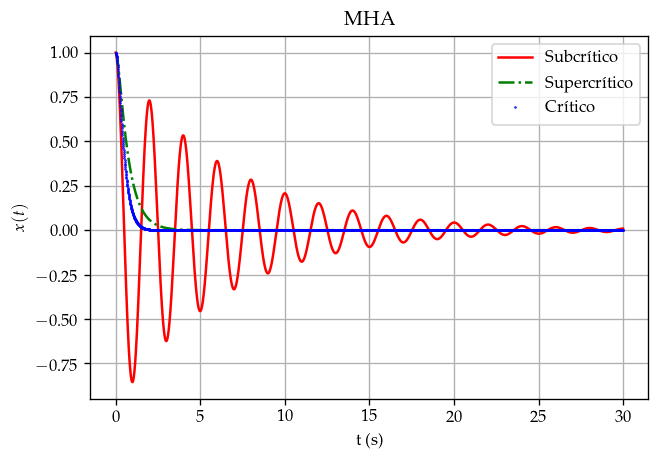

In [352]:
#Gráficos x vs t
plt.rcParams['figure.dpi'] = 120.0    

from matplotlib import rc
#rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.title('MHA')
plt.plot(t,xt,'r-',label='Subcrítico')
plt.plot(t,xt2,'g-.',label='Supercrítico',markersize=1)
plt.plot(t,xt3,'b.',label='Crítico',markersize=1)
plt.ylabel(r'$x(t)$')
plt.xlabel('t (s)')
plt.legend()
plt.grid()
plt.show()  

## Movimento Harmônico Forçado (MHF)

Um sistema massa-mola em movimento harmônico amortecido e forçado pode ser descrito pela equação:

$$\ddot{x} + \gamma \dot{x} + \omega_0^2 x=F_0 cos(\omega_f t)$$

onde $\gamma=b/m$ é a constante relacionada ao amortecimento, $w_0=\sqrt{k/m}$ é a frequência angular de oscilação natural e $\omega_f$ a frequência angular da força motriz. A solução geral é dada pela soma da soluçao da equação homogênea mais a solução da equação particular: 
$$x(t)=x_h(t)+x_p(t)$$

A solução da equação homogênea obtivemos para o MHA e é transiente. Após um tempo suficiente, o sistema tende a oscilar na frequência da força motriz, e portanto, a solução tende para a particular. Nesse caso, a solução particular é dada por:

$$x_p(t)=A cos(\omega_f t + \Phi),$$

onde $A = \frac{F_0/m}{\sqrt{\left(\omega_0^2-\omega_f^2)^2\right)+\gamma^2\omega_f^2}}$ e $\Phi=-tg^{-1}\left(\frac{\gamma \omega_f}{\omega_0^2-\omega_f^2}\right)$

Para um MHA subcrítico e forçado, a solução completa é dada por:

$$x(t)=A_0 e^{-\frac{\gamma}{2}t} cos(\omega t + \phi) + Acos(\omega_f t + \Phi)$$

Use o código abaixo para alterar os parâmetros e observar o gráfico.

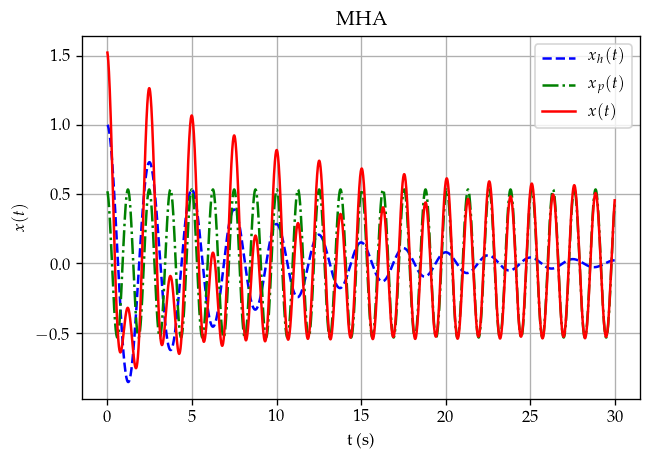

In [355]:
###PARÂMETROS###
# Velocidade inicial
v0=0
# Frequência natural em Hz
f=0.4
# Frequência angular natural em rad/s
w0=2*math.pi*f
# Constante de fase (phi) em graus
phi0=0
# Amplitude da força
F0=10
# Frequência angular da força em rad/s
wf=5
# Massa do sistema
m=1
#Gamma para Amortecimento Subcrítico
gamma=0.1*w0

###Solução da equação homogênea
xth = []
xth.append(A0)

##Frequência de oscilação homogênea
wh=math.sqrt(w0**2-(gamma/2)**2)

for i in range(1,imax):
    xth.append(A0*math.exp(-gamma/2*t[i])*math.cos(wh*t[i]+phi0))

###Solução da equação particular
xtp = []
xtotal = []
Af=(F0/m)/(math.sqrt((w0**2-wf**2)**2+gamma**2*wf**2))
phif=-math.atan(gamma*w/(w0**2-w**2))
xtp.append(Af*math.cos(phif))
xtotal.append(xth[0]+xtp[0])

for i in range(1,imax):
    xtp.append(Af*math.cos(wf*t[i]+phif))
    xtotal.append(xth[i]+xtp[i])

#Gráficos x vs t
plt.rcParams['figure.dpi'] = 120.0    

from matplotlib import rc
#rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.title('MHA')
plt.plot(t,xth,'b--',label=r'$x_h(t)$',markersize=1)
plt.plot(t,xtp,'g-.',label=r'$x_p(t)$',markersize=1)
plt.plot(t,xtotal,'r-',label=r'$x(t)$')

plt.ylabel(r'$x(t)$')
plt.xlabel('t (s)')
plt.legend()
plt.grid()
plt.show()  

### Ressonância no MHF

A ressonância ocorre quanto a frequência da força coincide com a frequência natural de oscilação do sistema. Entretanto, o fenômeno só será relevante se $\gamma << \omega_0$. Nesse caso, se construirmos um gráfico da amplitude de oscilação forçado pela frequência da força, vemos que o pico ocorre exatamente para $\omega_f=\omega_0$.

Experimente alterar o valor de $gamma$ para observar o que acontece no gráfico abaixo.


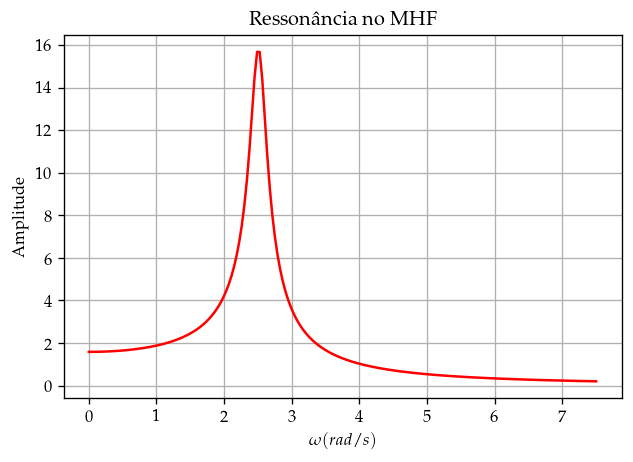

In [382]:
###PARÂMETROS###
#Gamma para Amortecimento Subcrítico
gamma=0.1*w0
# Frequência natural em Hz
f=0.4
# Frequência angular natural em rad/s
w0=2*math.pi*f
# Amplitude da força
F0=10
# Massa do sistema
m=1

###Frequência angular da força
wfmax=3*w0
wf = []
wf.append(0)
for i in range(1,200):
    wf.append(wf[i-1]+wfmax/200)

Af = []    
Af.append((F0/m)/w0**2)

for i in range(1,200):
    Af.append((F0/m)/(math.sqrt((w0**2-wf[i]**2)**2+gamma**2*wf[i]**2)))

#Gráficos
plt.rcParams['figure.dpi'] = 120.0    

from matplotlib import rc
#rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

plt.title('Ressonância no MHF')
plt.plot(wf,Af,'r-')
#plt.plot(t,xtp,'g-.',label=r'$x_p(t)$',markersize=1)
#plt.plot(t,xtotal,'r-',label=r'$x(t)$')

plt.ylabel('Amplitude')
plt.xlabel(r'$\omega(rad/s)$')
plt.grid()
plt.show()  